# Сборный проект

**Описание**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Цель исследования:** 

Выявить определяющие успешность игры закономерности и определить факторы для планирования рекламных кампаний

**Исследование пройдёт в шесть этапов:**

    1. Обзор данных
    2. Предобработка данных
    3. Исследовательский анализ данных
    4. Составление портретов пользователей разных регионов
    5. Проверка гипотез
    6. Общий вывод

## Обзор данных

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    print('Что-то пошло не так')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас имеется таблица с данными, состояющая из 11 столбцов. 
Согласно документации:

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

Соответсвенно в каждой строке таблицы имеется информация о названии игры, данные о продажах, оценки пользователей и экспертов, жанр и платформа.

Данных достаточно для проведения необходимого анализа и проверки гипотез. Однако в данных встречаются пропуски и типы данных в таблицах не везде соотвествуют необходимым.

## Предобработка данных

### Исправление названий столбцов

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия столбцов к нижнему регистру для удобства работы

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Заполнение пропусков

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как мы видим, в датасете имеются пропуски в 6 столбцах.

Что касается столбцов `year_of_release`, `name` и `genre`, пропуски могли появиться в результате ошибок ввода или технических ошибок. Но поскольку эти пропуски составляют всего 273 строки из 16715 (менее 2%) и нет надежного способа их восстановить, то для дальнейшего анализа их можно просто удалить

In [8]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

In [9]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Далее проверим пропущенные значения в столбце `user_score`. Посмотрим какие уникальные значения есть в данном столбце, прежде чем принять решение как их заменить.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можно заметить, что помимо числовых значений и пропусков (nan), в столбце также присутствуют ячейки с аббревиатурой tbd, что обычно означает To Be Determined (т.е. оценка будет определена позже). Посмотрим сколько таких строк имеется в датасете

In [11]:
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В таблице имеется 2376 строк с аббревиатурой tbd, что достаточно много, просто так удалить такой объем данных нельзя. К тому же, в остальных столбцах имеется вся необходимая информация для анализа. Но поскольку tbd подразумевает, что на данный момент оценки нет, можно считать, что это то же самое, что и пропуск. Заменим значения с аббревиатурой на пустые.

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Количество пропусков в `user_score` увеличилось до 8981. Удалить данные не представляется возможным, это более 50% всего датасета. Заполнить их корректно также невозможно. В данном случае будет правильнее заменить их на -1 и учитывать это при дальнейшем анализе. 

In [14]:
data['user_score'] = data['user_score'].fillna(-1)

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score            0
rating             6676
dtype: int64

Теперь проверим пропуски в столбцах `critic_score` и `rating`

In [16]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В данном столбце не имеется аббревиатур, а пропусков слишком много чтобы их удалить. Заменим их также на -1

In [17]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Стоит обратить внимание, что в списке имеется рейтинг 'K-A'. Однако, такая категория была заменена на 'E' еще в 1998 году и более не используется. Стоит заменить значение 'K-A' на 'E'. Пропусков также слишком много, чтобы их удалить, но и заполнить их без дополнительной информации не представляется возможным. Поступим с ними также, как с предыдущими пропусками - заменим на -1

In [19]:
data['rating'] = data['rating'].str.replace('K-A', 'E', regex=True)

In [20]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
data['rating'] = data['rating'].fillna(-1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [23]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Все пропуски в данных обработаны, можно идти дальше

### Изменение типов данных

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1


### Поиск дубликатов

Проверим данные на наличие явных дубликатов

In [27]:
data.duplicated().sum()

0

### Cоздание столбца

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`

In [28]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


**Вывод**

- Заголовки приведены к нижнему регистру, чтобы упростить работу с таблицей 
- Удалены пропущенные значения (1.6%) в столбце `year_of_release`
- Пропущенные значения в столбцах `critic_score`, `user_score` и `rating` заменены на '-1'
- Изменен тип данных в столбцах `year_of_release` и `user_score`
- Создан столбец `total_sales` с суммарными продажами во всех регионах

Можно приступать к анализу

## Исследовательский анализ данных

### Анализ количества игр, выпущенных в разные годы

Изучим сколько игр выпускалось в разные годы

In [30]:
data.groupby(by='year_of_release')['name'].agg('count')

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

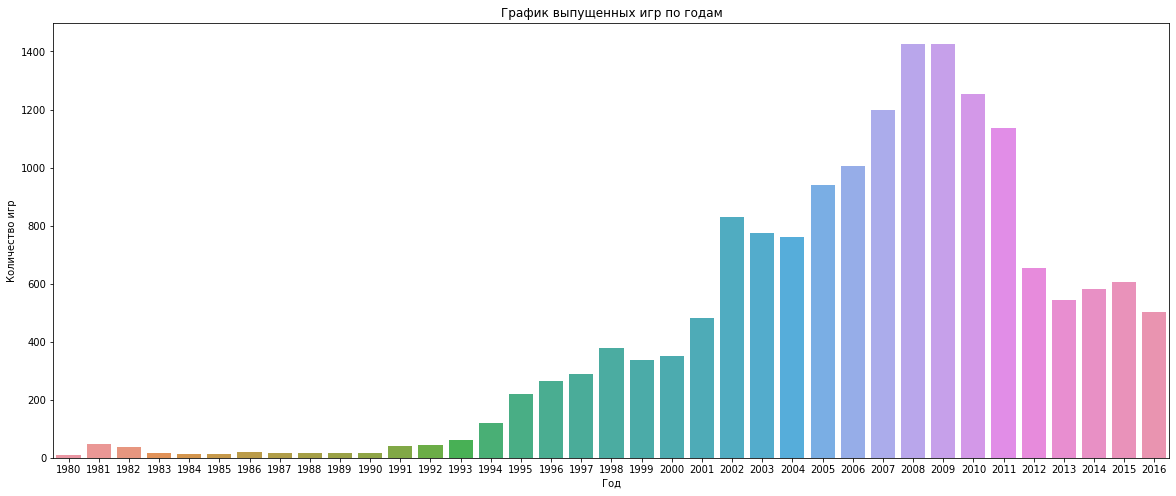

In [31]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x='year_of_release', 
    y='name', 
    data=data.groupby(by='year_of_release')['name'].agg('count').reset_index()
)
plt.title('График выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

**Вывод:** 

Из данных видно, что рост в выпуске игр начался с 1994 года и продолжался до 2008 года, но с небольшими спадами в 1999 и 2003-2004 годах. 

Пиковых значений рынок достиг в 2008-2009 годах, возможно по причине того, что во время экономического кризиса одним из немногих бюджетных развлечений стали игры. 

После кризиса случился резкий спад в последующие четыре года. Можно предположить, что причиной такого спада стали выход IPhone и смартфонов на базе Android, которые заинтересовали разработчиков игр. 

Последующий рост в выпуске игр наблюдается уже после 2013 года и связан скорее всего с выходом нового поколения консолей. 

Так как индустрия игр очень динамично меняется, для дальнейшего анализа будет правильнее использовать данные начиная именно с 2013 года, когда были представлены новые поколения консолей.

### Анализ продаж по платформам

In [32]:
data.groupby(by='platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Для дальнейшего анализа возьмем первые 6 платформ, поскольку дальше между суммарными продажами можно заметить слишком большой разрыв (разница между продажами PS и PS4 более чем в 2 раза). Создадим переменную с топ-6 платформами и сгруппируем их по годам

In [33]:
top_6_platforms = data.loc[data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
top_6_grouped = top_6_platforms.groupby(by=['year_of_release', 'platform'])['total_sales'].agg('sum').reset_index()

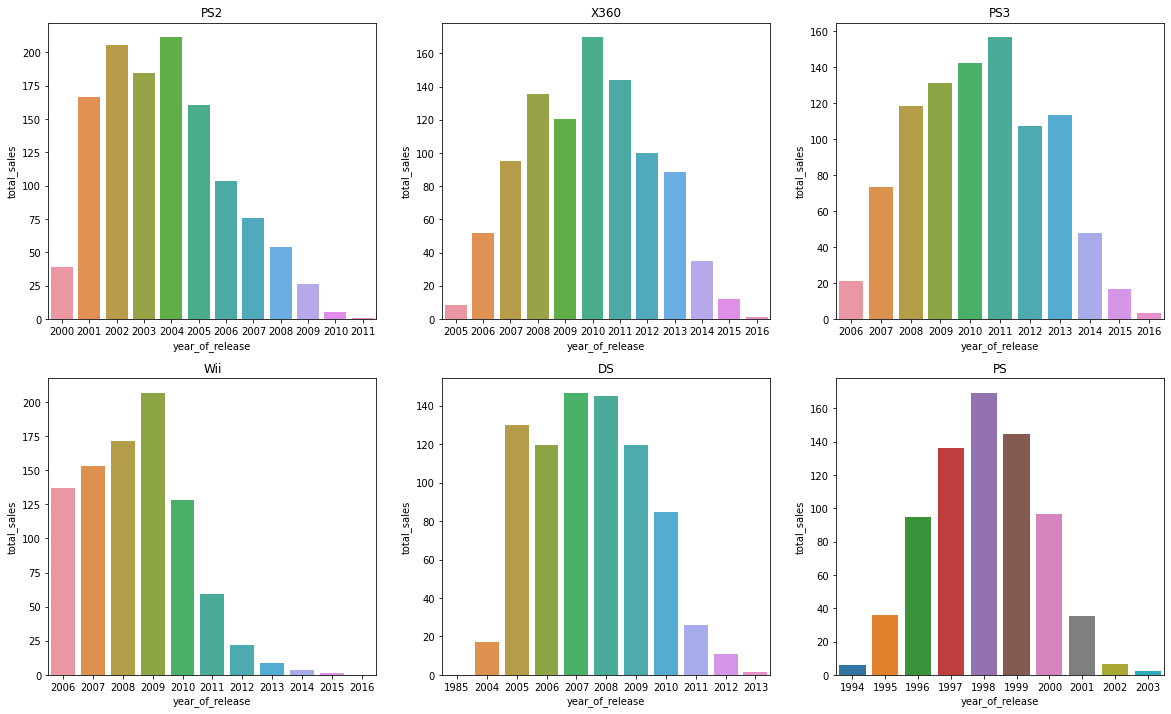

In [34]:
f, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.barplot(ax=axes[0][0], x="year_of_release", y="total_sales", data=top_6_grouped.query('platform == "PS2"'))
axes[0][0].set_title('PS2')

sns.barplot(ax=axes[0][1], x="year_of_release", y="total_sales", data=top_6_grouped.query('platform == "X360"'))
axes[0][1].set_title('X360')

sns.barplot(ax=axes[0][2], x="year_of_release", y="total_sales", data=top_6_grouped.query('platform == "PS3"'))
axes[0][2].set_title('PS3')

sns.barplot(ax=axes[1][0], x="year_of_release", y="total_sales", data=top_6_grouped.query('platform == "Wii"'))
axes[1][0].set_title('Wii')

sns.barplot(ax=axes[1][1], x="year_of_release", y="total_sales", data=top_6_grouped.query('platform == "DS"'))
axes[1][1].set_title('DS')

sns.barplot(ax=axes[1][2], x="year_of_release", y="total_sales", data=top_6_grouped.query('platform == "PS"'))
axes[1][2].set_title('PS')

plt.show()

Судя по графикам из топ-6 продаваемых платформ, можно заметить, что три места занимают разные поколения PS (наибольший пик продаж игр для PS наблюдался в конце 90ых, для PS2 - в начале 2000ых, PS3 - в 2011). Главным конкурентом PS3 в 2010-2011 годах можно назвать X360. Что касается игр для платформ Wii и DS - пик на их продажи приходится на 2008-2009 годы. Также стоит отметить, что у платформы DS имеется некий выброс в 1985 году, возможно это ошибочные данные, так как релиз платформы состоялся в 2004 году

In [35]:
temp_data = data.groupby(by='platform')['year_of_release'].agg(['min', 'max']).reset_index()

In [36]:
temp_data['range'] = temp_data['max'] - temp_data['min']
print(f'Средний срок жизни платформы: {round(temp_data["range"].mean())} лет.')

Средний срок жизни платформы: 8 лет.


### Выделение актуального периода

Выделим данные за 2013-2016 года в отдельный датасет, так как мы выяснили ранее, что данный период является наиболее актуальным для последующего анализа

In [37]:
new_data = data.loc[data['year_of_release'] > 2012]
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


### Потенциально прибыльные платформы

Сгруппируем данные и посмотрим какие платформы лидируют по продажам, чтобы выделить потенциально прибыльные

In [38]:
new_data.groupby(by='platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

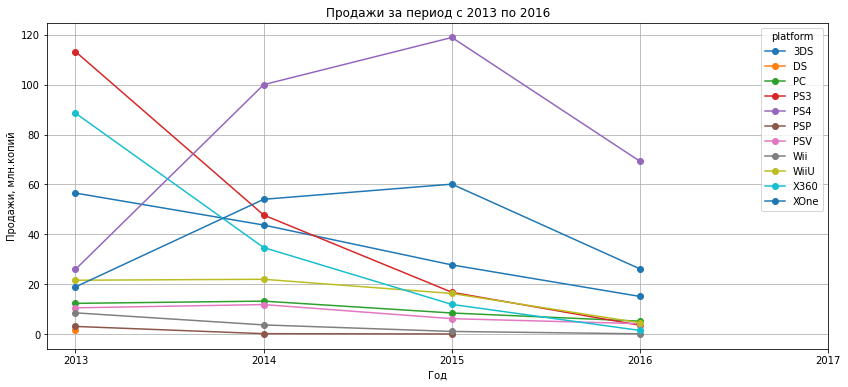

In [39]:
new_data.pivot_table(
    index='year_of_release',
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(grid=True, figsize=(14, 6), style=('o-')).set_xticks(range(2013,2018))
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий')
plt.title('Продажи за период с 2013 по 2016')
plt.show()

**Вывод:** 

Из полученных данных можно выделить пять платформ с наибольшими продажами: PS4, PS3, XOne, 3DS и X360. 

В то же время по графику можно заметить, что начиная с 2013 года продажи игр для платформ PS4 и XOne (год их выпуска) резко пошли вверх, а вот продажи игр для их предшественников (PS3 и X360) соответственно резко пошли вниз.

Что касается продаж игр для 3DS, то они плавно снижаются начиная уже с 2013 года. 

Также стоит отметить, что данные за 2016 год неполные и показатели за 2016 могли выровняться.

### Глобальные продажи игр по платформам

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

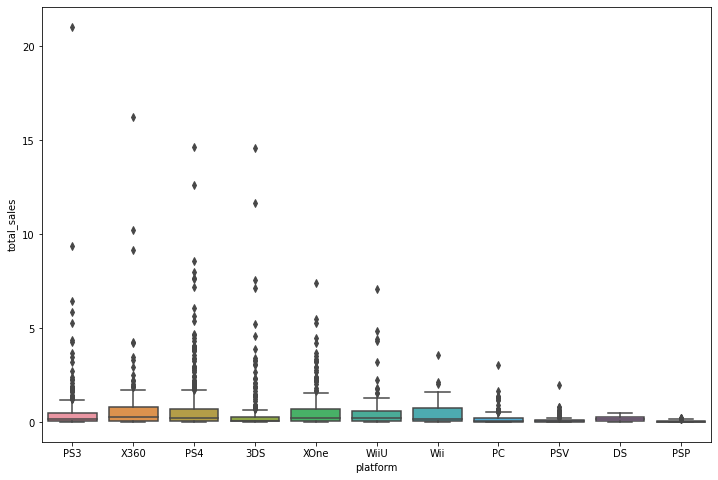

In [40]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x='platform', y='total_sales', data=new_data)
plt.show()

Для большей наглядности немного ограничим выбросы

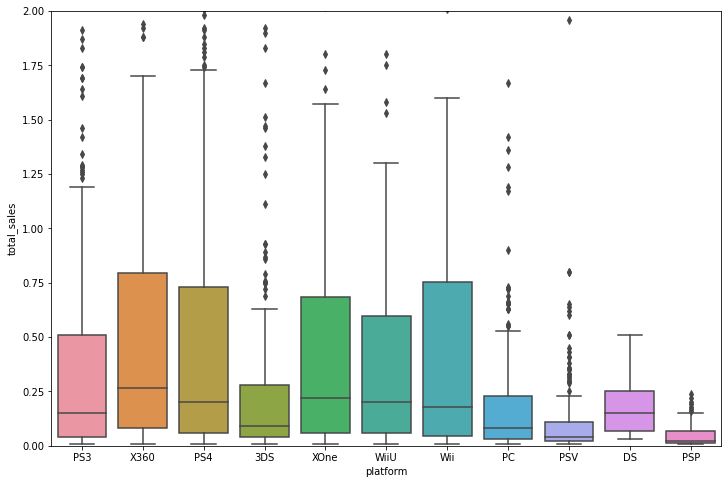

In [41]:
plt.figure(figsize = (12,8))
plt.ylim(0,2)
ax = sns.boxplot(x='platform', y='total_sales', data=new_data)
plt.show()

Посмотрим какие платформы лидируют по продажам

In [42]:
new_data.groupby(by='platform')['total_sales'].agg('sum').nlargest(5).reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


Теперь проверим какие платформы входят в топ-5 по медианам

In [43]:
new_data.groupby(by='platform')['total_sales'].agg('median').nlargest(5).reset_index()

,platform,total_sales
0,X360,0.265
1,XOne,0.220
2,PS4,0.200
3,WiiU,0.200
4,Wii,0.180


**Вывод:**

Лидерами по общим продажам являются PS4, PS3 и XOne за счет того, что они имеют много хитов принесших нетипично большую прибыль. 

В то же время, если посмотреть список топ-5 по медианным продажам, картина будет иная: лидером является X360, за ним идет XOne,  и только потом PS4.

### Влияние отзывов пользователей и критиков на продажи

#### PS4

Посмотрим как влияют отзывы пользователей и критиков на продажи внутри одной из популярных платформ: PS4, а также построим матрицу корреляций.

Создадим переменную `ps_4` и исключим из нее строки со значениями -1 в столбцах `user_score` и `critic_scrore`

In [44]:
ps_4 = new_data.loc[(new_data['platform'] == 'PS4') & (new_data['user_score'] != -1) & (new_data['critic_score'] != -1)]
ps_4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,-1,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


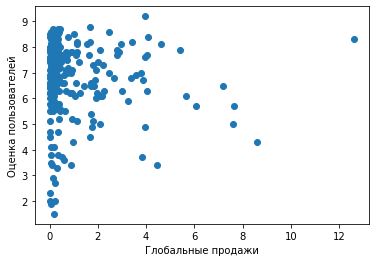

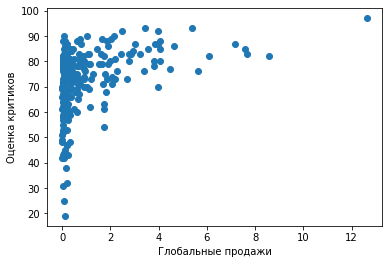

In [45]:
x = ps_4['total_sales']
y = ps_4['user_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка пользователей')
plt.show()

x = ps_4['total_sales']
y = ps_4['critic_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка критиков')
plt.show()

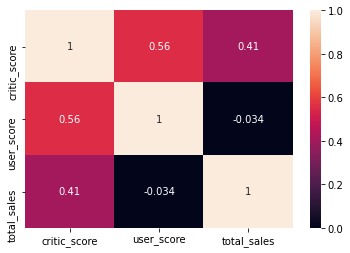

In [46]:
sns.heatmap(ps_4[['critic_score', 'user_score', 'total_sales']].corr(), annot=True, vmin=0, vmax=1)
plt.show()

**Вывод:**

По графикам можно отметить, что для PS4 не видно зависимости между продажами и оценкой пользователей. В то же время, можно также заметить, что продажи становятся выше при оценке критиков более 70.

Коэффициент корреляции между продажами и оценкой критиков составляет 0.41, что говорит о слабой положительной корреляции между факторами. Корреляция же между оценками пользователей и продажами составляет -0.034, что говорит об отсутствии линейной связи между параметрами.

#### PS3, XOne, 3DS

Посмотрим прослеживается ли такая же тенденция у других платформ. Возьмем для анализа PS3, XOne и 3DS

In [47]:
ps_3 = new_data.loc[(new_data['platform'] == 'PS3') & (new_data['user_score'] != -1) & (new_data['critic_score'] != -1)]

In [48]:
xone = new_data.loc[(new_data['platform'] == 'XOne') & (new_data['user_score'] != -1) & (new_data['critic_score'] != -1)]

In [49]:
ds3 = new_data.loc[(new_data['platform'] == '3DS') & (new_data['user_score'] != -1) & (new_data['critic_score'] != -1)]

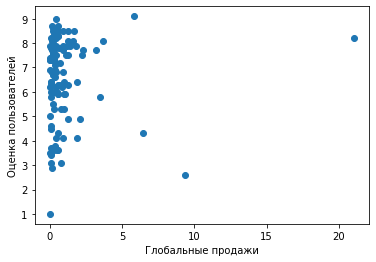

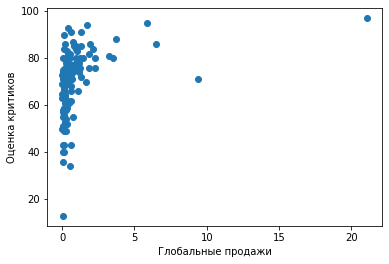

In [50]:
x = ps_3['total_sales']
y = ps_3['user_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка пользователей') 
plt.show()

x = ps_3['total_sales']
y = ps_3['critic_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка критиков') 
plt.show()

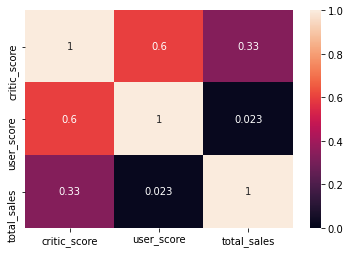

In [51]:
sns.heatmap(ps_3[['critic_score', 'user_score', 'total_sales']].corr(), annot=True, vmin=0, vmax=1)
plt.show()

**Вывод:**

По графикам можно отметить, что для PS3 не видно зависимости между продажами и оценкой пользователей.

Коэффициент корреляции между продажами и оценкой критиков составляет 0.33, что говорит о слабой положительной корреляции между факторами. Корреляция же между оценками пользователей и продажами составляет 0.023, что говорит об отсутствии линейной связи между параметрами.

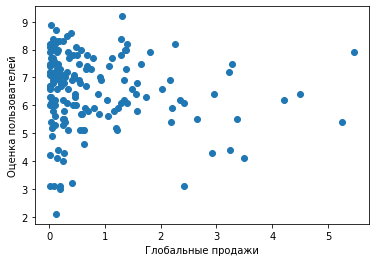

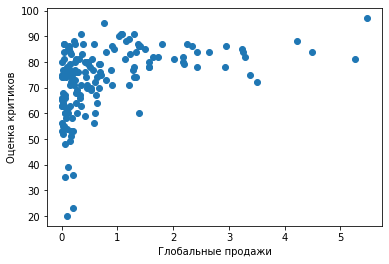

In [52]:
x = xone['total_sales']
y = xone['user_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка пользователей') 
plt.show()

x = xone['total_sales']
y = xone['critic_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка критиков') 
plt.show()

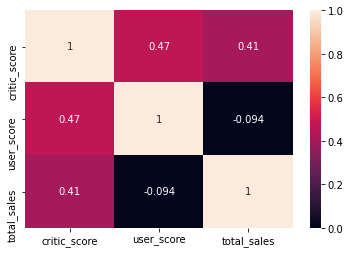

In [53]:
sns.heatmap(xone[['critic_score', 'user_score', 'total_sales']].corr(), annot=True, vmin=0, vmax=1)
plt.show()

**Вывод:**

По графикам можно отметить, что для XOne также как и у предыдущих платформ не видно зависимости между продажами и оценкой пользователей.

Коэффициент корреляции между продажами и оценкой критиков составляет 0.41, что говорит о слабой положительной корреляции между факторами. Корреляция же между оценками пользователей и продажами составляет -0.094, что говорит об очень слабой отрицательной корреляции или отсутствии линейной связи между параметрами.

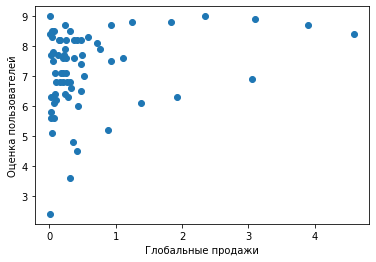

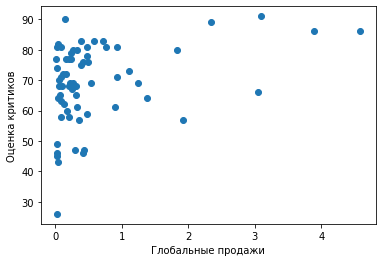

In [54]:
x = ds3['total_sales']
y = ds3['user_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка пользователей') 
plt.show()

x = ds3['total_sales']
y = ds3['critic_score']
plt.scatter(x, y)
plt.xlabel('Глобальные продажи')
plt.ylabel('Оценка критиков') 
plt.show()

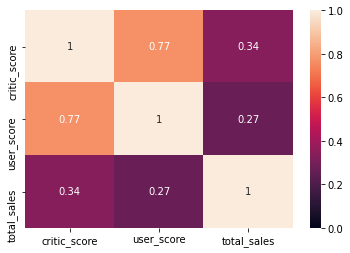

In [55]:
sns.heatmap(ds3[['critic_score', 'user_score', 'total_sales']].corr(), annot=True, vmin=0, vmax=1)
plt.show()

**Вывод:**

Для платформы 3DS можно заметить, что графики взаимосвязи оценок критиков и оценок пользователей с продажами очень похожи.

Коэффициент корреляции между продажами и оценкой критиков составляет 0.34, что говорит о слабой положительной корреляции между факторами. Также есть очень слабая положительная корреляция между оценками пользователей и продажами 0.27.

Можно отметить, что в отличие от предыдущих платформ для 3DS характерна более сильная линейная связь между оценками пользователей и продажами.

### Анализ распределения игр по жанрам

In [56]:
new_data.groupby(by='genre')['name'].agg('count').sort_values(ascending=False)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

Больше всего было выпущено игр в жанре Action - 766, а меньше всего в жанре Puzzle - 17. В топ-5 жанров также входят Role-Playing(292), Adventure(245), Sports(214) и Shooter(187).

Тепепь посмотрим на общие продажи игр по жанрам

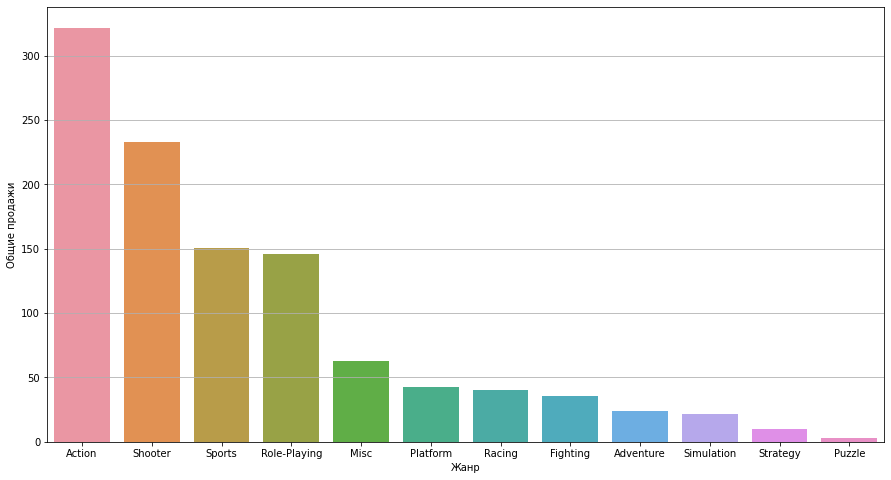

In [57]:
plt.figure(figsize=(15,8))
plt.grid(True)
ax = sns.barplot(
    x='genre',
    y='total_sales',
    data=new_data.groupby(by='genre')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
)
ax.set(xlabel='Жанр')
ax.set(ylabel='Общие продажи')
plt.show()

Судя по графику самые высокие продажи у жанра Action. На втором месте по продажам стоит жанр Shooter, за ними следуют Role-Playing, Sports и Misc. 
Стоит заметить, что игр жанра Action было и выпущено больше всех.

Однако, не стоит судить о прибыльности жанра по общим продажам: за высокими показателями общих продаж иногда может скрываться множество мелких игр с низкими продажами. Поэтому также посчитаем средние продажи по жанрам

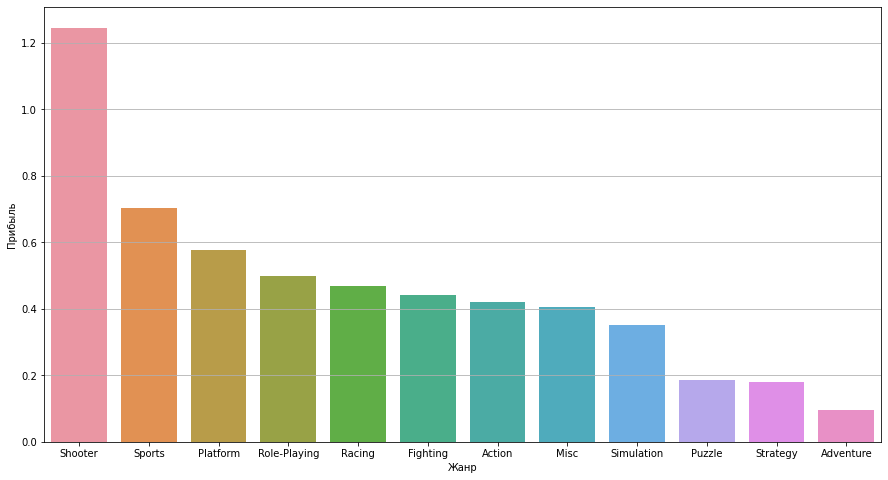

In [58]:
plt.figure(figsize=(15,8))
plt.grid(True)
ax = sns.barplot(
    x='genre',
    y='total_sales',
    data=new_data.groupby(by='genre')['total_sales'].agg('mean').sort_values(ascending=False).reset_index()
)
ax.set(xlabel='Жанр')
ax.set(ylabel='Прибыль')
plt.show()

Теперь, если посмотреть на график средних продаж по жанрам, то на первом месте окажется жанр Shooter со средней прибылью 1.25. За ним следуют жанры Sports(0.7) и Platform(0.58). Таким образом, хотя Action игр и выпускается больше, средняя прибыль у него ниже, он находится лишь на 7 месте.

## Портрет пользователей по регионам

### Северная Америка

Найдем топ-5 самых популярных платформ в Северной Америке

In [59]:
new_data.groupby('platform')['na_sales'].agg('sum').nlargest(5)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Теперь определим топ-5 самых популярных жанров для этого региона

In [60]:
new_data.groupby('genre')['na_sales'].agg('sum').nlargest(5)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Стоит посмотреть влияет ли рейтинг ESRB на продажи в Северной Америке

In [61]:
new_data.groupby(by='rating')['na_sales'].agg('sum').sort_values(ascending=False)

rating
M       165.21
-1       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

**Вывод:** 

Исходя из полученных данных можно сделать вывод, что в Северной Америке лидирует по продажам PS4. За ней следуют XOne, X360, PS3 и 3DS. Что касается жанров: лидером является жанр Action, за ним следуют Shooter, Sports, Role-Playing, а также Misc. Также больше всего продается игр с рейтингом М, а далее идут игры без рейтинга, E, E10+ и T.

### Европа

In [62]:
new_data.groupby('platform')['eu_sales'].agg('sum').nlargest(5)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [63]:
new_data.groupby('genre')['eu_sales'].agg('sum').nlargest(5)

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [64]:
new_data.groupby(by='rating')['eu_sales'].agg('sum').sort_values(ascending=False)

rating
M       145.32
E        83.36
-1       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

**Вывод:** 

Больше всего продаются в Европе платформы PS4, PS3, XOne, X360 и 3DS. Лидерами среди жанров являются Action, затем Shooter, Sports, Role-Playing и Racing. По рейтингам ESRB картина выглядит так: M, E, без рейтинга, E10+, T

### Япония

In [65]:
new_data.groupby('platform')['jp_sales'].agg('sum').nlargest(5)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

In [66]:
new_data.groupby('genre')['jp_sales'].agg('sum').nlargest(5)

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [67]:
new_data.groupby(by='rating')['jp_sales'].agg('sum').sort_values(ascending=False)

rating
-1      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

**Вывод:** 

В Японии на первом месте по продажам находится 3DS, а за ней следуют PS3, PSV, PS4 и WiiU. Топ-5 жанров выглядят следующим образом: на первом месте стоит Role-Playing, а за ним идут Action, Misc, Fighting и Shooter. Что касается рейтингов:  на первом месте игры без рейтинга, а за ними следуют T, E, M и E10+

### Вывод

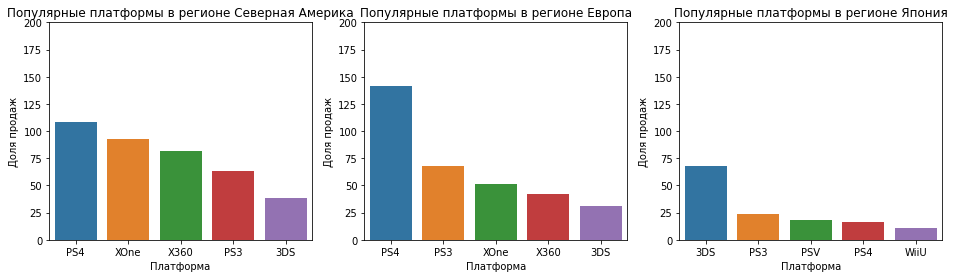

In [68]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
names = ['Северная Америка', 'Европа', 'Япония']

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, cur_ax in enumerate(axes.flat):
    reg = regions[i]
    name = names[i]
    sns.barplot(
        ax = cur_ax, 
        x='platform', 
        y=reg, 
        data=new_data.groupby(by='platform')[reg].agg('sum').nlargest(5).reset_index())

    cur_ax.set(ylim=(0,200))
    cur_ax.set(xlabel='Платформа')
    cur_ax.set(ylabel='Доля продаж')
    cur_ax.set_title(f'Популярные платформы в регионе {name}')

    
plt.show()

Глядя на графики и полученные раннее данные можно сделать вывод, что в Северной Америке и в Европе более популярны консольные приставки, в то время, как в Японии предпочитают портативные платформы.

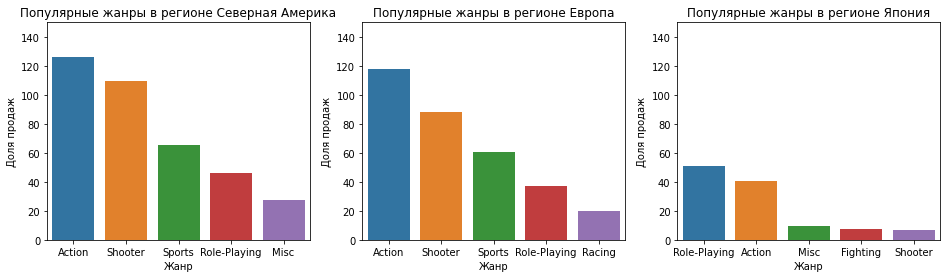

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, cur_ax in enumerate(axes.flat):
    reg = regions[i]
    name = names[i]
    sns.barplot(
        ax = cur_ax, 
        x='genre', 
        y=reg, 
        data=new_data.groupby(by='genre')[reg].agg('sum').nlargest(5).reset_index())
    
    cur_ax.set(ylim=(0,150))
    cur_ax.set(xlabel='Жанр')
    cur_ax.set(ylabel='Доля продаж')
    cur_ax.set_title(f'Популярные жанры в регионе {name}')

    
plt.show()

Можно заметить, что в Северной Америке и Европе топ-5 жанров распределились практически одинаково, с разницей лишь в жанре,занимающим последнюю 5 строчку: Misc в Северной Америке и Racing в Европе. Однако в Японии картина совершенно другая.

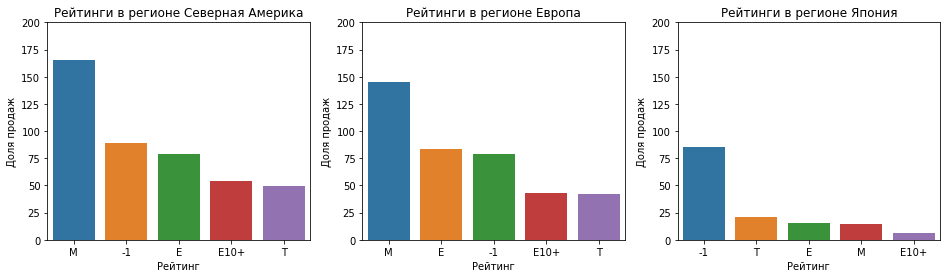

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, cur_ax in enumerate(axes.flat):
    reg = regions[i]
    name = names[i]
    sns.barplot(
        ax = cur_ax, 
        x='rating', 
        y=reg, 
        data=new_data.groupby(by='rating')[reg].agg('sum').nlargest(5).reset_index())
    
    cur_ax.set(ylim=(0,200))
    cur_ax.set(xlabel='Рейтинг')
    cur_ax.set(ylabel='Доля продаж')
    cur_ax.set_title(f'Рейтинги в регионе {name}')

    
plt.show()

Рейтинги ESRB:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам» - от 13 лет
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

В Северной Америке и Европе доли продаж и рейтинги опять практически совпадают. В Японии же дело обстоит иначе: на первом месте находятся игры без рейтинга. Cтоит отметить, что ESRB - американская компания, а в других регионах могут быть свои рейтинги. Это и может быть причиной такого распределения топ-5 в Японии

## Проверка гипотез

### Гипотеза первая

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки гипотезы используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. 

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Пороговое значение: 5%

In [71]:
x_box_one = new_data.loc[(new_data['platform'] == 'XOne') & (new_data['user_score'] != -1)]
pc = new_data.loc[(new_data['platform'] == 'PC') & (new_data['user_score'] != -1)]

In [72]:
alpha = .05

results = st.ttest_ind(
    x_box_one['user_score'], 
    pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [73]:
print('Средние пользовательские рейтинги платформы Xbox One -', x_box_one['user_score'].mean().round(2))
print('Средние пользовательские рейтинги платформы PC -', pc['user_score'].mean().round(2))

Средние пользовательские рейтинги платформы Xbox One - 6.52
Средние пользовательские рейтинги платформы PC - 6.27


**Вывод:** 

Как видно из полученных данных, при уровне статистической значимости 0.05, p-value получился равен 0.14, что соответственно не дает нам оснований отвергнуть нулевую гипотезу. Также по средним значениям мы видим, что средние пользовательские рейтинги платформ Xbox One и PC очень близки.

### Гипотеза вторая

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Для проверки гипотезы используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. 

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
H1: Средние пользовательские рейтинги жанров Action и Sports отличаются

Пороговое значение: 5%

In [74]:
action = new_data.loc[(new_data['genre'] == 'Action') & (new_data['user_score'] != -1)]
sports = new_data.loc[(new_data['genre'] == 'Sports') & (new_data['user_score'] != -1)]

In [75]:
alpha = .05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [76]:
print('Средние пользовательские рейтинги жанра Action -', action['user_score'].mean().round(2))
print('Средние пользовательские рейтинги жанра Sports -', sports['user_score'].mean().round(2))

Средние пользовательские рейтинги жанра Action - 6.84
Средние пользовательские рейтинги жанра Sports - 5.24


**Вывод:** 

Таким образом мы отвергаем нулевую гипотезу. Также по среднему значению мы видим, что средние пользовательские рейтинги жанра Action выше, чем жанра Sports.

## Общий вывод

В ходе работы были проделаны **следующие шаги**:
- названия столбцов были приведены к нижнему регистру
- удалены пропущенные значения в столбцах: year_of_release, name и genre
- в столбце user_score были заменены значения 'tbd' на пустые значения
- пропущенные значения в столбцах user_score, critic_score и rating были заменены на -1
- изменен тип данных в столбцах year_of_release и user_score
- были посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец total_sales
- значения 'K-A' в столбце rating были заменены на 'E'

В ходе проделанного анализа мы получили **следующие результаты**:

- Больше всего игр выпускалось в 2008-2009 годах
- Актуальный период для прогноза продаж на 2017 год: с 2013 по 2016
- Средний срок жизни платформы - 8 лет
- Лидерами по продажам являются PS4, PS3 и XOne 
- Самыми прибыльными платформами по медианным значениям являются X360, XOne и PS4
- Отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей
- Самый популярный жанр игр: Action
- Самый прибыльнй жанр игр: Shooter

- В Северной Америке и Европе пользователи очень похожи:

    * Лидирует платформа PS4 и в общем более популярны консольные приставки
    * Cамые популярные жанры - Action, Shooter и Sports
    * C большим отрывом по продажам лидирует рейтинг M(17+)
    
- В Японии портрет пользователя отличается:
    * На первом месте по продажам находится 3DS, большей популярностью пользуются портативные платформы
    * Самые популярные жанры - Role-Playing, а за ним идут Action, Misc, Fighting и Shooter
    * Самые большие продажи у игр без рейтинга

Также нами были выдвинуты **две гипотезы** и получены следующие результаты:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза о равенстве рейтингов подтвердилась.
    
* Средние пользовательские рейтинги жанров Action и Sports отличаются. Нулевая гипотеза о равенстве рейтингов не подтвердилась. 
    

Исходя из всех полученных данных, можно сделать следующие **рекомендации:**

* Стоит обратить внимание на жизненный цикл платформы(8 лет), а также регион продаж. Для 2017 года речь идет о PS4 и Xbox One для Северной Америки и Европы и 3DS для рынка Японии
* Рекомендованные жанры для Северной Америки и Европы - Action и Shooter, для Японии - Role-Playing
* Рекомендованный рейтинг для всех регионов - E(для всех). Для Европы и Северной Америки - M(17+). Для Японии рейтинг ESRB не оказывает влияние на продажи, так как у них действует своя система рейтингов 